# Time Series Analysis 

## The Concept of Time Series and Its Components

Some models works better with some problems as certain approaches capture the characteristics of an event in a solid way. Time series modeling is a good example of this because the vast majority of data has a time dimension, which makes time-series applications a necessary tool for finance. In simple terms, the ordering of the data and and its correlation is important.

Well, let's get started to this broad topic with a question of why we need time series analysis?

### The concept and necessity of time series analysis

Techniques that we apply varies depending on the dataset at our disposal. The analysis of data with different time points leads to unique treatment in statistical modeling. In finance, having time dimension in the data is not a rare rather very common issues and these type of data should be treated with cautious.

The statistical modeling approach by which we try to address the statistical issues considering the time dimension is referred to as `time series analysis`. For instance, stock prices, inflation, economic growth, dividend payment, interest rates, weather data are just a few cases in which data has time dimension.

More theoretically, suppose that we have random variables denoted as $x_t$, $x_{t-1}$, $x_{t-2}$ where $x_t$ denotes realization of z at time t. If current value of x ($x_t$) depends on the lag values ($x_{t-1}$, $x_{t-2}$ and so on), we are talking about time series modeling.

The primary motivation in time series analysis lies in the correlation in time. More specifically, as the current value is to some degree dependent on its past values. So, the correlation between successive time points can unveil the dependence structure of this time-based relationship.

With that being said, if you want to take into account an effect of a specific event occured in previous period, time series analysis is a good choice. For example, the effect of heavy snow on sales happened last year is considered by the model. So, if this happens once again, time series model would generate lower sales figures based on it.

This is the main difference between time series and regression based models. To be more specific, in regressional models, the observations are independent from each other. This is not the case in time series model as we discussed in heavy snow incident.

 We are about the discuss in-depth time series analysis. Get ready and take a deep breath because if you are a financial modeling enthusiast, I bet this will be your reference course.

### Granularity, Frequency and Horizon in time series analysis

As we are talking about time series, the period over which time series forecasting is done is of considerable importance. In this respect, we will talk about granularity, frequency, and horizon.

**Granularity**

Granularity is a measure of the level of detail in a data structure. In time series context, granularity refers to the frequency or interval at which the data are recorded. According to the granularity, the more aggregate your forecasts are, the more accurate you are in your predictions.

Choosing right granularity helps us to remove noise from the data. So, we can end up with more accurate predictions.

**Frequency**

The frequency in time series analysis denotes the regularity in which data is collected. The frequency may be hourly, daily, weekly or monthly. Coming up with a proper frequency is important to detect the time series components, which will be discussed soon.

The final topic that we will discuss about the time dimension of time series analysis is horizon.

**Horizon**

The horizon is the length of time into the future for which forecasts are to be prepared. Differently, horizon is the time step to make for forecast. Horizon is quite important in time series analysis as it should be proportional to the length of the training data. 

If we set a very large forecast horizon, say 30 weeks, for an analysis trained by 50 observations. It may not be a good horizon choice. Picking a long horizon tends to approach the mean. Long story short, we should make prediction over a short horizon of time to end up with an accurate forecast.

### Extracting data using yahoo finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [17]:
stock = 'TSLA'
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,8,1)
tsla_close = yf.download(stock, start = start, end=end, interval='1d')['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
tsla_close.head(10)

Date
2020-12-31    235.223328
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
2021-01-08    293.339996
2021-01-11    270.396667
2021-01-12    283.146667
2021-01-13    284.803345
2021-01-14    281.666656
Name: Close, dtype: float64

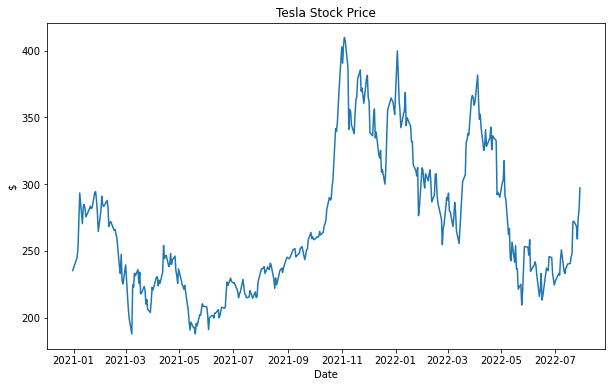

In [5]:
plt.plot(tsla_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Tesla Stock Price')
plt.show()

### Time Series components: Trend, seasonality, cyclicality, and noise

Here is another important topic of time series. Before modeling a time series, we need to know the characteristics of it and time series components give us a invaluable clue about the characteristics of a time series. In Python, `seasonal_decompose` is the package that can be used in identifying the components.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

We will discuss in detail the decomposition model but for the sake of brevity, I would like to briefly talk about the `additive` and `multiplicative` model that we use in seasonal decomposition.

Additive model:

\begin{equation} 
x_t = Trend + Seasonal + Random
\end{equation} 

Multiplicative model:

\begin{equation} 
x_t = Trend * Seasonal * Random
\end{equation} 

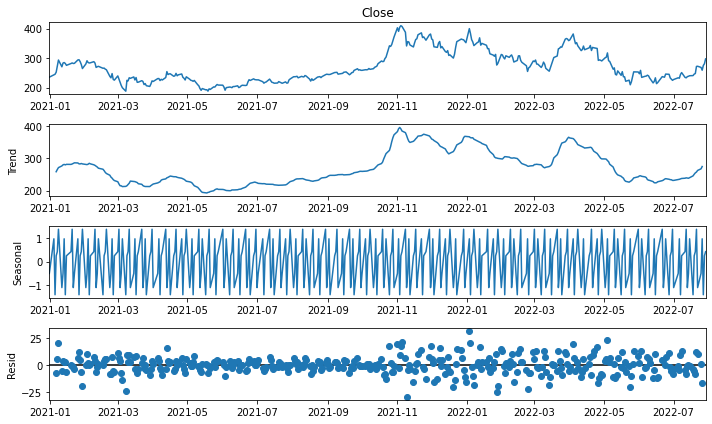

In [8]:
decomposition = seasonal_decompose(tsla_close, model='additive', period=7)
decomposition.plot()
plt.show()

In the first graph, we see the behavior of the raw data. Overall, it has a upward trend despite a drop at the end of the first quarter of 2022.

The second plot exhibits the trend of the data. Trend shows the overall movement of a time series. We can say that there exist a trend if there is a long-term increase or decrease in the data. So, we need to focus on the mean of the data at the beginning and end of the period to detect the trend. Trend needs to be removed before the modeling stage and this process is known as `de-trending` process.

Seasonality is the third plot which shows periodical ups and downs in the data. If there is a seasonality in the data, it should also be removed. For instance, sales of a fast food company goes up during summer in coastal area and goes down during winter in the same region. It indicates quarterly seasonality. Seasonality might be weekly, monthly, quarterly, or yearly.

The last graph show the residuals. This is obtained after removing the trend and seasonal components from the time series. If we end up with a rather stable residual, it means that our data is stationary structure and ready to move on the modeling part. This is something we will discuss in the stationary topic in Module-2. At first glance, the highly volatile distribution of the residual indicates that the data is not stationary.

Final time series component, which is not on the graph is cyclicality.  It exists when higher periodic variation than the trend emerges. Some confuse cyclicality and seasonality in a sense that they both exhibit expansion and contraction. We can, however, think of cyclicality as business cycles, which take a long time to complete their cycles and the ups and downs are over a long horizon. So cyclicality is different from seasonality in the sense that there is no fluctuation in a fixed period. 

### Dealing with missing value and outliers in time series

Dealing with missing value requires special attention as it highly depends on the task. Meaning that some methods used to deal with missing value works better than others in a specific model.

For instance, filling with mean and median values are widely used in regression analysis but it is not a very good option in time series analysis. The reason is that using mean or median carry too historical data, which might have little or less information to account for the current value.

Therefore, we will discuss the following methods for missing value:

* Forward Fill
* Backward Fill
* Interpolation

**Forward Fill**

Forward fill (or Last Observation Carried Forward) imputes the missing values with the previous ones.

In [10]:
df_tsla = pd.DataFrame(tsla_close)
df_tsla.iloc[-5]= np.NaN

In [11]:
df_tsla.tail()

,Close
Date,
2022-07-25,NaN
2022-07-26,258.859985
2022-07-27,274.820007
2022-07-28,280.899994
2022-07-29,297.149994


In [13]:
df_tsla['tsla_fill'] = df_tsla['Close'].ffill()
df_tsla['tsla_fill'].tail(10)

Date
2022-07-18    240.546661
2022-07-19    245.529999
2022-07-20    247.500000
2022-07-21    271.706665
2022-07-22    272.243347
2022-07-25    272.243347
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: tsla_fill, dtype: float64

**Backward Fill**

Backward fill (or Next Observation Carried Backward) has a same approach with forward fill but works in opposite direction.  Backward fill imputes the missing values with its future value.

In [14]:
df_tsla['tsla_bfill'] = df_tsla['Close'].bfill()
df_tsla['tsla_bfill'].tail(10)

Date
2022-07-18    240.546661
2022-07-19    245.529999
2022-07-20    247.500000
2022-07-21    271.706665
2022-07-22    272.243347
2022-07-25    258.859985
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: tsla_bfill, dtype: float64

**Interpolation**

Interploation is a very common method for missing data. This working logic behind the interpolation is this: It estimates the missing values by assuming a relationship within a range of data points.

There are different ways of interpolation, I just list two of them:

* Linear: Assumes linear relationship between range of data points

* Time: Estimates missing values by focusing more on nearby points than far away points.

You can find the other interpolation methods [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

In [15]:
from scipy import interpolate
df_tsla['tsla_interpolate'] = df_tsla['Close'].interpolate(option='time')

In [16]:
df_tsla.tail(20)

,Close,tsla_fill,tsla_bfill,tsla_interpolate
Date,,,,
2022-07-01,227.263336,227.263336,227.263336,227.263336
2022-07-05,233.066666,233.066666,233.066666,233.066666
2022-07-06,231.733337,231.733337,231.733337,231.733337
2022-07-07,244.543335,244.543335,244.543335,244.543335
2022-07-08,250.763336,250.763336,250.763336,250.763336
2022-07-11,234.343338,234.343338,234.343338,234.343338
2022-07-12,233.070007,233.070007,233.070007,233.070007
2022-07-13,237.039993,237.039993,237.039993,237.039993
2022-07-14,238.313339,238.313339,238.313339,238.313339


Well, you can readily observe, the results of different imputation techniques are quite different from each other. So, it is up to your expertise and the data to pick the right imputation strategy.

**Isolation forest**

Isolation forest is a machine learning algorithm that is widely used in anomaly detections. It also works well with time series data. Therefore, I would like to use it as a outlier detection tool in this course.

First off, let me define the outlier. An observation is considered to be an outlier if it deviates `too much` from other observations. The term `too much` is subject to interpretation. There is no certain threshold beyond which an observation becomes outlier. It depends on the data and the analysis.

As you can imagine there are many different methods that you can use in detecting anomalies such as clustering-based, forecasting, seasonal-trend decomposition (STL) to name a few. However, we will focus on the isolation forest as it is applicable almost automatically and generate rather accurate results.

The working logic of isolation forest is that it basically concentrates on the data that is different from others. To do that, we use a hyperparameter called `contamination`. Contamination identifies the proportion of outliers in the data set. So, differently from other algorithms, we do not need to calculate distance or obtain time series components to run outlier detection. This makes isolation forest rather convenient and easy-to-apply algorithm.

Well, enough introduction! Let's apply isolation forest and see how it works on a real stock price data.

Isolation forest algorith, by design, accepts array type data. So, we need to convert out data into an array type. Also, having missing value lead us to length mismatch error. So, wee need to use data with non-missing values. I pick `tsla_close_interpolate` column for outlier detection.

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
tsla_scaled = scaler.fit_transform(tsla_close.values.reshape(-1,1))
tsla_scaled = pd.DataFrame(tsla_scaled)

In [31]:
np.arange(0.01, 0.05, 0.01)

array([0.01, 0.02, 0.03, 0.04])

In [35]:
contamination = np.arange(0.01, 0.05, 0.01)
outliers = []
for i in contamination:
    isolation_forest = IsolationForest(contamination=i)
    isolation_forest.fit(tsla_scaled)
    outliers.append(isolation_forest.predict(tsla_scaled))
#df_tsla['anomaly'] = isolation_forest.predict(tsla_scaled)

In [44]:
outliers

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
         1, 

In [27]:
df_tsla['anomaly'].value_counts()

 1    377
-1     20
Name: anomaly, dtype: int64

In [28]:
df_tsla[df_tsla['anomaly']==-1]

,Close,tsla_fill,tsla_bfill,tsla_interpolate,anomaly
Date,,,,,
2021-03-08,187.666672,187.666672,187.666672,187.666672,-1
2021-05-13,190.563339,190.563339,190.563339,190.563339,-1
2021-05-17,192.276672,192.276672,192.276672,192.276672,-1
2021-05-18,192.623337,192.623337,192.623337,192.623337,-1
2021-05-19,187.820007,187.820007,187.820007,187.820007,-1
2021-05-21,193.626663,193.626663,193.626663,193.626663,-1
2021-06-03,190.946671,190.946671,190.946671,190.946671,-1
2021-11-01,402.863342,402.863342,402.863342,402.863342,-1
2021-11-02,390.666656,390.666656,390.666656,390.666656,-1


In [25]:
df_tsla['Close'].describe()

count    396.000000
mean     269.567357
std       52.457048
min      187.666672
25%      228.684162
50%      253.540001
75%      302.605827
max      409.970001
Name: Close, dtype: float64

### Additive and multiplicative decomposition

Decomposition as additive and multiplicative models are used to describe the trend and seasonality in a time series. So, the main objective of decomposition is to estimate seasonal effect to end up with a de-seasonal values.

* The additive model is useful when the seasonal variation is relatively constant over time.
* The multiplicative model is useful when the seasonal variation increases over time.

It would be helpful to remind you the equations of additive and multiplicative models here:

Additive model:

\begin{equation} 
x_t = Trend + Seasonal + Random
\end{equation} 

Multiplicative model:

\begin{equation} 
x_t = Trend * Seasonal * Random
\end{equation} 

Depending on the seasonal variation, you choose the suitable one to use in your time series model.

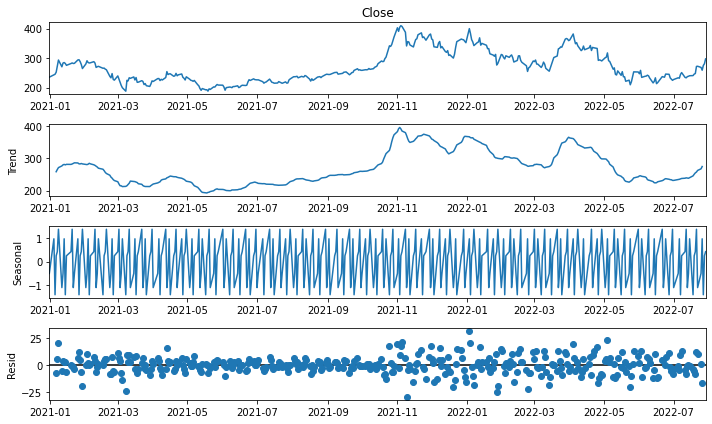

In [45]:
decomposition = seasonal_decompose(tsla_close, model='additive', period=7)
decomposition.plot()
plt.show()

Notice that the magnitude of the seasonal component is relatively lower in the additive time series than that of the multiplicative series.

We are about to discuss two other important concepts in time series modeling: **White Noise** and **Stationary** 

## White Noise

In fact, white noise does not, originally, belong a time series analysis. It is borrowed from physics. White noise is a random signal having equal intensity. This property makes it useful in time series analysis, because a time series might have this property.

In order to have white noise in time series, data should be independent and identically distributed (i.i.d) with a mean of zero and also have constant variance over time.

Let's generate white noise using Python.

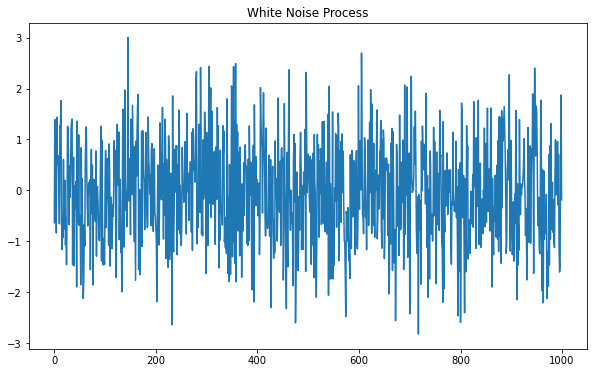

In [46]:
mu = 0
std = 1
sample_size = 1000
wn = np.random.normal(mu, std, sample_size)
plt.plot(wn)
plt.title('White Noise Process')
plt.show()

## Random Walk

A random walk is another time series model where the current observation is equal to the previous observation with a random up or down movement. Mathematically speaking:

\begin{equation}x_t = x_{t-1} + e_t\end{equation}

Stepping back, we obtain:

\begin{equation}x_{t-1} = x_{t-2} + e_{t-1}\end{equation}

If we keep repeating this process, we end up with the following:

\begin{equation}x_t = e_t + e_{t-1} + e_{t-2} + \cdots \end{equation}

So, the path of $x_t$ is determined by $x_{t-1}$ and $e_t$ which is completely random. Hence it is clear to see how the random walk is simply the sum of the elements from a discrete white noise series.

In [61]:
def random_walk(steps):
    x, y = 0, 0 
    time_steps = np.arange(steps)
    position = [y]
    random_direction = ['up', 'down']
    for i in range(1, steps):
        step = np.random.choice(random_direction)
        if step =='up':
            y+=1
        elif step=='down':
            y-=1
        position.append(y)
    return time_steps, position

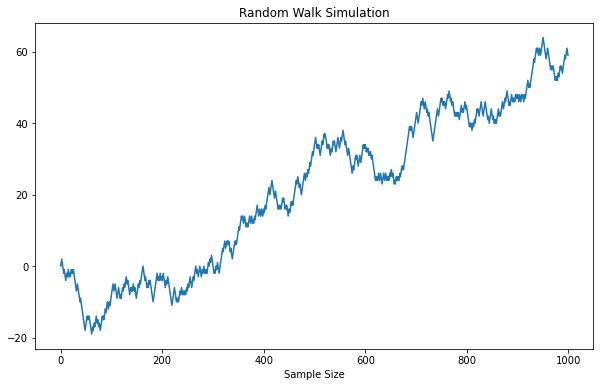

In [66]:
steps = 1000
time_steps, position = random_walk(steps)
plt.plot(time_steps, position)
plt.title('Random Walk Simulation')
plt.xlabel('Sample Size')
plt.show()

## The concept of Stationarity 

Stationary is a way to model the dependent structure that we have in time-dependent data. For instance, current stock price is somewhat related to the previous prices of the stock.

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.

Stationary can be divided into two as:
   * Strictly Stationary
   * Weakly Stationary

**Strictly stationary**

This occurs when {$x_{t1}$, $x_{t2}$,...,$x_{tk}$} is identical to the shifted set of {$x_{t1+h}$, $x_{t2+h}$,...,$x_{tk+h}$}

**Weakly stationary** 

Weakly stationary time series is satisfied when:

* Mean of a series is constant over time
* The variance of the series should not a be a function of time. In other words, covariance function, $\gamma(s,t)$ depends on |s-t| only.

## Detecting and handling with stationarity

In time series, it is common to have non-stationary data and taking difference is a way to make non-stationary data a stationary one. Taking first difference is nothing but taking difference of two successive values. 

\begin{equation}\Delta x=x_t-x_{t-1}\end{equation}

\begin{equation}\Delta x=x_{t-1}-x_{t-2}\end{equation}

To show how it take the first difference in Python. By doing that, we are able to observe the changes between stationary and non-stationary data.

As you remember, we modified the original data in the previous module for showing the procedures for missing values. Now, we need to get the original data without missing value to move on. Therefore, I retrieve the data from yahoo finance again.

In [67]:
tsla_close

Date
2020-12-31    235.223328
2021-01-04    243.256668
2021-01-05    245.036667
2021-01-06    251.993332
2021-01-07    272.013336
                 ...    
2022-07-25    268.433319
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: Close, Length: 397, dtype: float64

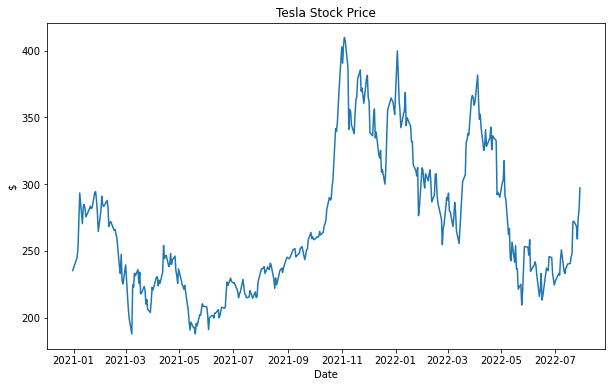

In [68]:
plt.plot(tsla_close)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Tesla Stock Price')
plt.show()

In [70]:
tsla_diff = tsla_close.diff().dropna()
tsla_diff

Date
2021-01-04     8.033340
2021-01-05     1.779999
2021-01-06     6.956665
2021-01-07    20.020004
2021-01-08    21.326660
                ...    
2022-07-25    -3.810028
2022-07-26    -9.573334
2022-07-27    15.960022
2022-07-28     6.079987
2022-07-29    16.250000
Name: Close, Length: 396, dtype: float64

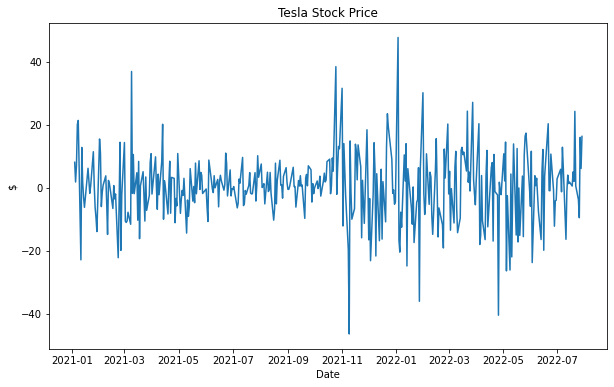

In [71]:
plt.plot(tsla_diff)
plt.xlabel('Date')
plt.ylabel('$')
plt.title('Tesla Stock Price')
plt.show()

## Statistical Test for detecting stationarity: ADF

Statistical tests provide us a robust method to detect stationarity. In this part of the class, we will talk about a statistical method in detecting the stationarity: Augmented Dickey Fuller (`ADF`)

Before proceeding, we need to know unit root test as ADF is built on top of it. A unit root test checks if a time series is not stationary and consists of a unit root in time series analysis. Let's take a simple autoregressive (AR(1)) process. No worries, we will discuss AR process very soon!.

\begin{equation} x_t = ax_{t-1} + \epsilon_t \end{equation} 

where a is the coefficient and $ x_t$ is a time series and $\epsilon$ is the noise.

If a=1, the unit root is present and this makes a time series non-stationary.

So, in ADF, we set a hypothesis test to detect that. Accordingly,

* The null hypothesis ($H_0$) states that there is a unit root.
* The alternative hypothesis ($H_A$) states that there is no unit root.

To put it statistically, 

\begin{equation}H_0 :a = 1\end{equation}
\begin{equation}H_A :a < 1\end{equation}

In [76]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(tsla_close)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -2.08257398114325 and p-value is 0.2515791743287744


Let us focus on the p-value as it is easy to interpret. It suggests that the time series is non-stationary as it is higher than 0.05. So, what is next? We need to find a way to make the data stationary. Do you remember differencing? Let's apply it.

In [77]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(tsla_diff)
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -6.118058680016161 and p-value is 8.993960310848576e-08


Well, good news! After taking the first difference, it is quite obvious that the time series becomes stationary.

All right! We have covered very important topics in time series analysis. We have only one topic to go before time series modeling. This is autocorrelation (acf) and partical autocorrelation functions (pacf). These functions can be used for different tasks such as lag identification and determining stationary.

# ACF and PACF

We will start discussing the difference between correlation and autocorrelation. As its name implies, autocorrelation is the correlation of the same variable at different times, say $X_t$ and $X_{t+k}$.

Thus, autocorrelation is a correlation coefficient and the formula is as follows:

\begin{equation}
r_k = \frac{\Sigma_{i=1}^{N-k}(X_i - \overline{X})(X_{i+k} - \overline{X})}{\Sigma_{i=1}^{N-k}(X_i - \overline{X})^2}
\end{equation}

Please note that, when we say correlation, we refer to the Pearson correlation:

\begin{equation}
\rho_{x, y} = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var(X)}\text{Var(Y)}}}
\end{equation}

Pearson correlation measures the strength of linear dependence between X and
Y , and lies between -1 and 1.

## Autocorrelation Function (ACF) 

Autocorrelation implies serial dependence. Precisely, it occurs when a time series is highly correlated with its lagged version. It is shown by acf plot. The longer of the bar in the acf plot, the more dependence a series has.

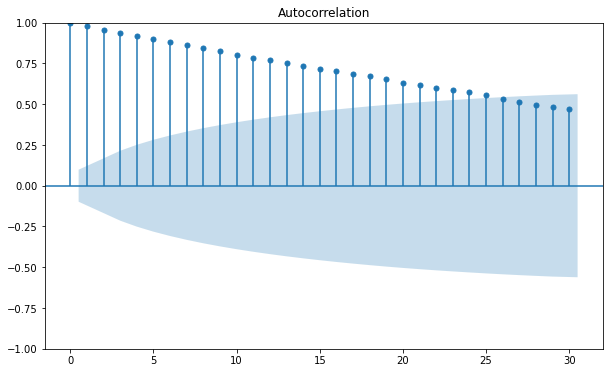

In [81]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(tsla_close, lags=30);

The `acf` plot indicates that acf is slowly decaying, which is an indicator of non-stationarity. Besides, the blue shaded area represents the confidence interval. If the bar is in this confidence interval, it indicates that there is no significant correlation between this lag and the current one and this information is used for identifying the optimal lag. As this data is non-stationary, it makes no sense to apply this information here.

Let's see what happens when the first difference of the stock price is taken. `.diff()` function takes the first difference in Python.

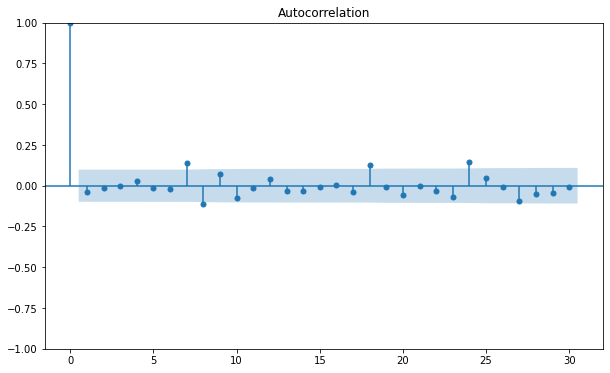

In [82]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(tsla_diff, lags=30);

$$x_t =\alpha + x_{t-1} + x_{t-2}+\cdots +x_{t-7}+x_{t-8} $$

$$x_t =\alpha + x_{t-1} + x_{t-2}+\cdots +x_{t-24} $$

The above-given acf plot exhibits that there is a spike at the $7^{th}$ and $8^{th}$ lags. Moreover, we have more peaks at larger lags. So, it is up to you to choose the proper lag as it depends your approach. If you want to focus on shorter window, choose $7^{th}$ and $8^{th}$ lag, otherwise the larger lags works better. Here, I pick $8^{th}$ lag.

Please note that we cannot always use acf for identfying the optimal lag. Depending on the model we choose, we either pick acf or pacf. For instance, in moving average, acf is used for this task. As for the autoregressive model and its extensions, pacf is the tool. But, wait, we have not discussed the pacf yet. Let us introduce the pacf.

## Partial Autocorrelation Function (PACF) 

Partial Autocorrelation Function (PACF) is another method to examine the relationship between ${X_t}$ and ${X_{t-p}}, p\in \mathbb{Z}$. ACF is considered as a useful tool in MA(q) model simply because it lets us define the cut-off point for optimal lag. ACF is, however, not working well with AR(p) process.

PACF provides information on correlation between current value of a time series and its lagged values controlling for the other correlations. Mathematically,

$$
\hat \rho(h)= \frac{\text{Cov}(X_t,X_{t-h}|X_{t-1},X_{t-2}\ldots X_{t-h-1})}{\sqrt{\text{Var}(X_t|X_{t-1},X_{t-2},\ldots, X_{t-h-1})\text{Var}(X_{t-h}|X_{t-1},X_{t-2},\ldots, X_{t-h-1})}}
$$

The result that we get from pacf is similar to what we have in acf. So, let's move on and pick $8^{th}$ lag. We are going to use this lag structure in our time series model.

Well, that is for the acf/pacf and lag identification. We are all set to move forward and run our very first time series models.

After getting familiar with time series components and stationarity, readers are ready to move on to modeling a time series. In this module, you will use some of the well-known classical time series models to make predictions.

## Time Series Models

After briefly visiting the theory of time series, it is time to discuss the main time series models, which are:

* Naive Method
* Simple Average Method
* Moving Average (MA) model
* Autoregressive Average
* Single exponential smoothing
* Double exponential smoothing
* Holt-Winter Exponential Smoothing


## Naive Method

Naive method is one the basic time series models. This model proposes a prediction at time t by considering t-1 only.

The theory behind Naive model is that simple and so is its application. However, before going into the modeling stage, there is one step that we need to take for all time series models:`Splitting data`

Splitting data into training and test is essential in time series as in other models. But let's briefly discuss why it is that important?

The reason is that if we do not split the data, model cannot generalize the result. That is to say, train data is used in fitting (or learning) stage and test data (unseen data) put aside so that we can run prediction based on a data, which is unseen by model before.

Shortly, in the training stage, model learn from train data and then in the prediction part, model applies what it has learned using test data.

As you can imagine, there are different methods applicable to train-test split but time series analysis requires a special one as we have sequence in time. With that being said, we are going to apply train-test split based on time.

All right, as it is readily observable, naive method is so naive that it only takes into account the value at time t-1 and run prediction based on it. In order to have a better predictive performance from this model, the time at which you start your prediction it is of considerable importance.